## Module 5: General Linear Regression and Statistical Inference

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [1]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib


# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
data['MedianHouseValue'] = california.target

Print the basic information of the data using `.info()` and `.describe`.

In [2]:
# Display basic information
print(data.head())
print(data.info())
print(data.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedianHouseValue  
0    -122.23             4.526  
1    -122.22             3.585  
2    -122.24             3.521  
3    -122.25             3.413  
4    -122.25             3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3

### Step 1

Let `X` be the variables `MedInc`, `AveRooms`, and `AveOccup` and add the constant for the intercept. Let `y` be the `MedianHouseValue`.

Now fit the regreson model calling it `mlr_model`.

Finally, return the $r^2$ value of the model rounding to four decimal places.

Shape of X: (20640, 4)
Shape of y: (20640,)
R-squared value: 0.4808
            MedInc  AveRooms  AveOccup
MedInc    1.000000  0.326895  0.018766
AveRooms  0.326895  1.000000 -0.004852
AveOccup  0.018766 -0.004852  1.000000


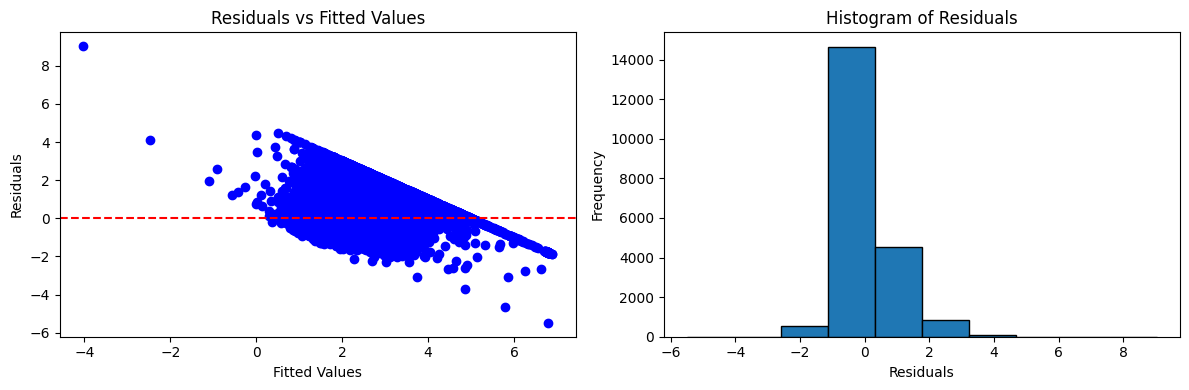

In [39]:
# CodeGrade step1

# define predictors (X) and response variables (y)
X = data[['MedInc', 'AveRooms', 'AveOccup']]
X = sm.add_constant(X)

y = data['MedianHouseValue']

# verify shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# initialize and fit multiple linear regression model
mlr_model = sm.OLS(y, X).fit()

# find r-squared
r2 = mlr_model.rsquared
print(f"R-squared value: {r2:.4f}")

# check for multicollinearity among predictors to ensure they are not highly correlated

# calculate the correlation matrix
correlation_matrix = data[['MedInc', 'AveRooms', 'AveOccup']].corr()

# print the correlation matrix
print(correlation_matrix)

# residuals vs fitted plot to assess homoscedasticity (constant variance of residuals)
# histogram of residuals to assess normality of residuals

# get the residuals
residuals = mlr_model.resid

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Residuals vs Fitted Values
axes[0].scatter(mlr_model.fittedvalues, residuals, color='blue')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals vs Fitted Values')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')

# Plot 2: Histogram of Residuals
axes[1].hist(residuals, bins=10, edgecolor='black')
axes[1].set_title('Histogram of Residuals')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Print the model summary.

In [14]:
# Print the model summary
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:       MedianHouseValue   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     6370.
Date:                Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                        21:11:47   Log-Likelihood:                -25477.
No. Observations:               20640   AIC:                         5.096e+04
Df Residuals:                   20636   BIC:                         5.099e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6069      0.016     37.444      0.0

### Step 2

Let `p_values` be the models' p-values.

Return the four p-values using `.iloc[]` from the first value to the fourth, in order and separated by commas. Make sure to round each to 5 decimal places.

In [18]:
# CodeGrade step2

p_values = mlr_model.pvalues.iloc[0:].round(5)
for p in p_values:
  print(f"{p:.5f}, ")

0.00000, 
0.00000, 
0.00000, 
0.00000, 


### Step 3

Identify the significant predictors (strictly less than $\alpha=0.05$) calling this `significant_predictors`.

Reutn the shape of `significant_predictors`.

In [21]:
# CodeGrade step3
# Filter for significant predictors (p < 0.05)
significant_predictors = mlr_model.pvalues[mlr_model.pvalues < 0.05]

# Print each p-value rounded to 5 decimals
for p in significant_predictors:
    print(f"{p:.5f}, ")

# Print shape
print("Shape:", significant_predictors.shape)

0.00000, 
0.00000, 
0.00000, 
0.00000, 
Shape: (4,)


### Step 4

Find the confidence intervals of the model (at a 95% level of confidence) and calling this `conf_intervals`.

Using `.iloc[,]` and rounding to 2 decimal places return the four confidence intervals in order of (separated by commas)

> first row and first column, first row and second column, second row and first column, second row and second column





In [30]:
# CodeGrade step4
print("Confidence Intervals:")

conf_intervals = mlr_model.conf_int(alpha=0.05).round(2)

# Extract specific values using .iloc
vals = [
    conf_intervals.iloc[0, 0],  # const lower
    conf_intervals.iloc[0, 1],  # const upper
    conf_intervals.iloc[1, 0],  # MedInc lower
    conf_intervals.iloc[1, 1],  # MedInc upper
    conf_intervals.iloc[2, 0],  # AveRooms lower
    conf_intervals.iloc[2, 1],  # AveRooms upper
    conf_intervals.iloc[3, 0],  # AveOccup lower
    conf_intervals.iloc[3, 1],  # AveOccup upper
]

print(", ".join(map(str, vals)))

Confidence Intervals:
0.58, 0.64, 0.43, 0.44, -0.04, -0.03, -0.01, -0.0


Now to see how the intervals looks "nicely" return `conf_intervals`.

In [31]:
#Pretty CIs
conf_intervals

,0,1
const,0.58,0.64
MedInc,0.43,0.44
AveRooms,-0.04,-0.03
AveOccup,-0.01,-0.00


### Step 5

Add a quadratic term to the model, calling the new model `quad_model` where a new term is added to the data, viz. `MedInc_squared`, which is the square of `MedInc`.

Return $r^2$ of the quadratic model rounded to four decumal places.

In [41]:
# CodeGrade step5
# add quadratic term
data['MedInc_squared'] = data['MedInc'] ** 2

# update predictors
# X_quad = data[['MedInc', 'MedInc_squared']]
X_quad = data[['MedInc', 'AveRooms', 'AveOccup', 'MedInc_squared']]
X_quad = sm.add_constant(X_quad)

# initialize and fit quadratic model
quad_model = sm.OLS(y, X_quad).fit()

# find r-squared
r2_quad = quad_model.rsquared
print(f"R-squared value for quad model: {r2_quad:.4f}")

R-squared value for quad model: 0.4858


Now print the model summary.

In [42]:
# Print the model summary
print(quad_model.summary())

                            OLS Regression Results                            
Dep. Variable:       MedianHouseValue   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     4874.
Date:                Wed, 21 May 2025   Prob (F-statistic):               0.00
Time:                        21:54:27   Log-Likelihood:                -25378.
No. Observations:               20640   AIC:                         5.077e+04
Df Residuals:                   20635   BIC:                         5.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3551      0.024     14.

### Step 6

Find the adjusted $r^2$ for both of the models and call them `adjusted_r2_base` and `adjusted_r2_quad`, respectively.

Return these two adjusted $r^2$'s rounded to four decimal places, separated by a comma.

In [44]:
# CodeGrade step6
adjusted_r2_base = mlr_model.rsquared_adj
adjusted_r2_quad = quad_model.rsquared_adj

adjusted_r2_base, adjusted_r2_quad

(np.float64(0.48074591990192506), np.float64(0.4856862487881798))

Print both these adjusted $r^2$'s.

In [45]:

print(f"Adjusted R-squared for base model: {adjusted_r2_base:.4f}")
print(f"Adjusted R-squared for quadratic model: {adjusted_r2_quad:.4f}")

Adjusted R-squared for base model: 0.4807
Adjusted R-squared for quadratic model: 0.4857
